In [1]:
import videopipeline as vpl

In [2]:
def add_suffix(path, suffix, new_ext='.mp4'):
    return path.replace('.mp4', f'-{suffix}{new_ext}')

In [3]:
video_path = r"videos/1.mp4"
img_size = (800, 1000)
crop_pos = (200, 800)

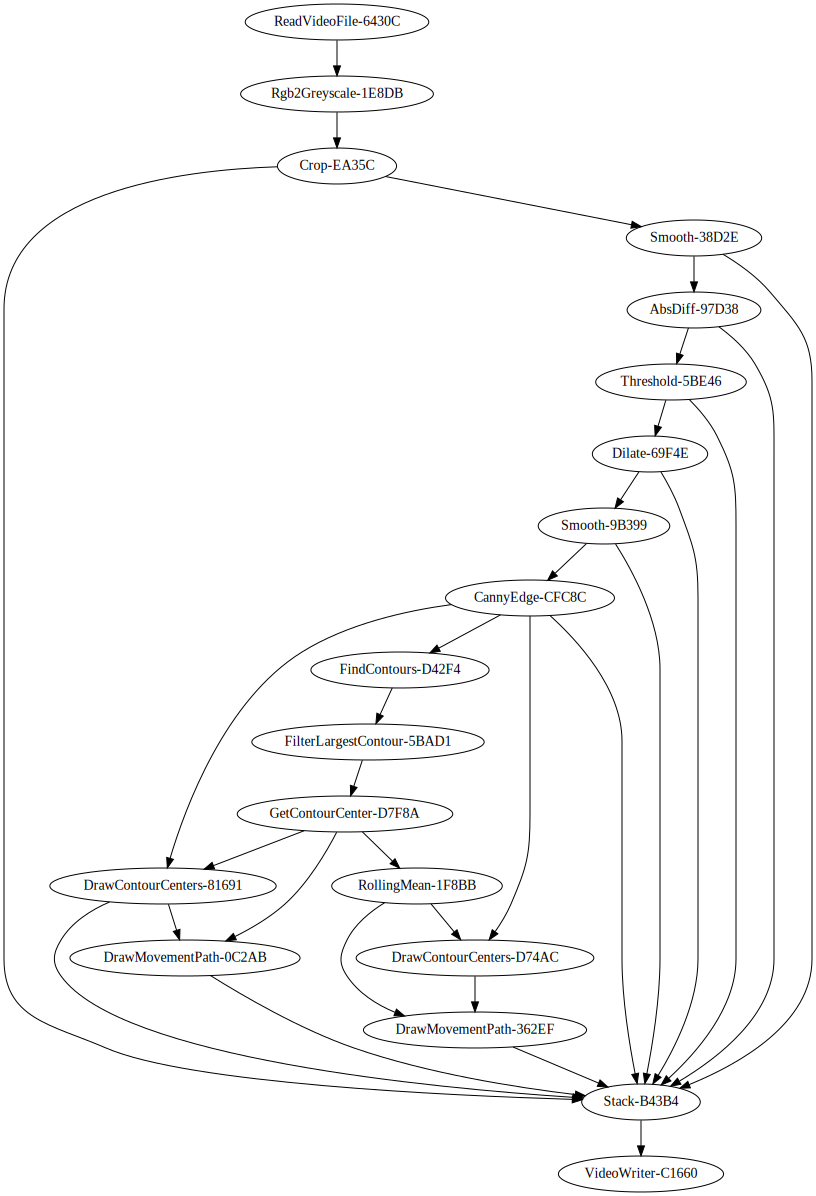

In [4]:
# Pipeline model
raw_video = vpl.generators.ReadVideoFile(video_path)
grey = vpl.functions.Rgb2Greyscale()(raw_video)
crop = vpl.functions.Crop(crop_pos, img_size)(grey)
smooth1 = vpl.functions.Smooth(101)(crop)
abs_diff = vpl.functions.AbsDiff()(smooth1)
threshold = vpl.functions.Threshold(32)(abs_diff)
dilate = vpl.functions.Dilate(150)(threshold)
smooth2 = vpl.functions.Smooth(11)(dilate)
canny_edge = vpl.functions.CannyEdge(1, 200)(smooth2)
find_contours = vpl.functions.FindContours()(canny_edge)

largest_contours = vpl.functions.FilterLargestContour()(find_contours)
contour_center = vpl.functions.GetContourCenter()(largest_contours)

contour_center_drawn1 = vpl.functions.DrawContourCenters()([canny_edge, contour_center])
movement_path_drawn1 = vpl.functions.DrawMovementPath()([contour_center_drawn1, contour_center])

smoothed_center = vpl.functions.RollingMean(5)(contour_center)
contour_center_drawn2 = vpl.functions.DrawContourCenters()([canny_edge, smoothed_center])
movement_path_drawn2 = vpl.functions.DrawMovementPath()([contour_center_drawn2, smoothed_center])

stacked = vpl.functions.Stack(4, 3)([
    crop, 
    smooth1, 
    abs_diff, 
    threshold, 
    dilate, 
    smooth2, 
    canny_edge, 
    contour_center_drawn1, 
    movement_path_drawn1,
    movement_path_drawn2,
])
writer = vpl.actions.VideoWriter(add_suffix(video_path, "dev"), 
                                 30, 
                                 aggregate=True, 
                                 collect=False, 
                                 verbose=True)(stacked)

p = vpl.core.Pipeline(writer)
p.render_model()

In [5]:
# Run pipeline
_ = p()

Aggregating 0
draw 0
draw 0
Aggregating 1
draw 0
draw 0
Aggregating 2
draw 0
draw 0
Aggregating 3
draw 0
draw 0
Aggregating 4
draw 0
draw 0
Aggregating 5
draw 0
draw 0
Aggregating 6
draw 0
draw 0
Aggregating 7
draw 0
draw 0
Aggregating 8
draw 0
draw 0
Aggregating 9
draw 0
draw 0
Aggregating 10
draw 0
draw 0
Aggregating 11
draw 0
draw 0
Aggregating 12
draw 0
draw 0
Aggregating 13
draw 0
draw 0
Aggregating 14
draw 0
draw 0
Aggregating 15
draw 0
draw 0
Aggregating 16
draw 0
draw 0
Aggregating 17
draw 0
draw 0
Aggregating 18
draw 0
draw 0
Aggregating 19
draw 0
draw 0
Aggregating 20
draw 0
draw 0
Aggregating 21
draw 0
draw 0
Aggregating 22
draw 0
draw 0
Aggregating 23
draw 0
draw 0
Aggregating 24
draw 0
draw 0
Aggregating 25
draw 0
draw 0
Aggregating 26
draw 0
draw 0
Aggregating 27
draw 0
draw 0
Aggregating 28
draw 0
draw 0
Aggregating 29
draw 0
draw 0
Aggregating 30
draw 0
draw 0
Aggregating 31
draw 0
draw 0
Aggregating 32
draw 0
draw 0
Aggregating 33
draw 0
draw 0
Aggregating 34
draw 0
dr

Aggregating 80
draw 0
(16, 2) (16, 2)
color values 0 0
color values 168 28
color values 255 188
color values 52 140
color values 255 255
color values 164 255
color values 255 100
color values 120 120
color values 116 16
color values 255 196
color values 124 68
color values 104 44
color values 116 128
color values 12 188
color values 4 180
color values 56 204

draw 0
(16, 2) (16, 2)
color values 0 0
color values 84 16
color values 212 68
color values 116 4
color values 140 68
color values 255 28
color values 255 0
color values 192 12
color values 204 20
color values 204 12
color values 196 60
color values 116 72
color values 120 72
color values 96 108
color values 28 104
color values 20 128

Aggregating 81
draw 0
(16, 2) (16, 2)
color values 0 0
color values 168 28
color values 255 188
color values 52 140
color values 255 255
color values 164 255
color values 255 100
color values 120 120
color values 116 16
color values 255 196
color values 124 68
color values 104 44
color values 116 12

Aggregating 92
draw 0
(16, 2) (16, 2)
color values 0 0
color values 168 28
color values 255 188
color values 52 140
color values 255 255
color values 164 255
color values 255 100
color values 120 120
color values 116 16
color values 255 196
color values 124 68
color values 104 44
color values 116 128
color values 12 188
color values 4 180
color values 56 204

draw 0
(16, 2) (16, 2)
color values 0 0
color values 84 16
color values 212 68
color values 116 4
color values 140 68
color values 255 28
color values 255 0
color values 192 12
color values 204 20
color values 204 12
color values 196 60
color values 116 72
color values 120 72
color values 96 108
color values 28 104
color values 20 128

Aggregating 93
draw 0
(16, 2) (16, 2)
color values 0 0
color values 168 28
color values 255 188
color values 52 140
color values 255 255
color values 164 255
color values 255 100
color values 120 120
color values 116 16
color values 255 196
color values 124 68
color values 104 44
color values 116 12

Aggregating 104
draw 0
(16, 2) (16, 2)
color values 0 0
color values 168 28
color values 255 188
color values 52 140
color values 255 255
color values 164 255
color values 255 100
color values 120 120
color values 116 16
color values 255 196
color values 124 68
color values 104 44
color values 116 128
color values 12 188
color values 4 180
color values 56 204

draw 0
(16, 2) (16, 2)
color values 0 0
color values 84 16
color values 212 68
color values 116 4
color values 140 68
color values 255 28
color values 255 0
color values 192 12
color values 204 20
color values 204 12
color values 196 60
color values 116 72
color values 120 72
color values 96 108
color values 28 104
color values 20 128

Aggregating 105
draw 0
(16, 2) (16, 2)
color values 0 0
color values 168 28
color values 255 188
color values 52 140
color values 255 255
color values 164 255
color values 255 100
color values 120 120
color values 116 16
color values 255 196
color values 124 68
color values 104 44
color values 116 

Aggregating 116
draw 0
(16, 2) (16, 2)
color values 0 0
color values 168 28
color values 255 188
color values 52 140
color values 255 255
color values 164 255
color values 255 100
color values 120 120
color values 116 16
color values 255 196
color values 124 68
color values 104 44
color values 116 128
color values 12 188
color values 4 180
color values 56 204

draw 0
(16, 2) (16, 2)
color values 0 0
color values 84 16
color values 212 68
color values 116 4
color values 140 68
color values 255 28
color values 255 0
color values 192 12
color values 204 20
color values 204 12
color values 196 60
color values 116 72
color values 120 72
color values 96 108
color values 28 104
color values 20 128

Aggregating 117
draw 0
(16, 2) (16, 2)
color values 0 0
color values 168 28
color values 255 188
color values 52 140
color values 255 255
color values 164 255
color values 255 100
color values 120 120
color values 116 16
color values 255 196
color values 124 68
color values 104 44
color values 116 